In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA

!pip install tsfresh
import tsfresh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Programming/Centrifugal Pumps Maintenance'

#### Импорт и описание

In [ ]:
names = ['T1138P6000096', 'T1138P6000315', 'DMIDT1138P4000064', 'DSHORTT1138P4000064', 'DLONGT1138P4000064', 'DMIDT1138P2600012', 'DSHORTT1138P2600012', 'DLONGT1138P2600012', 'DMIDT1205P2300000', 
          'DSHORTT1205P2300000', 'DLONGT1205P2300000', 'T1205P2300000', 'T1138P4000064', 'T1138P2600012', 'T1138P600050', 'T1013P500399', 'DMIDT1138P2300058', 'DSHORTT1138P2300058', 
          'DLONGT1138P2300058']
descr = ["Наработка двигателя с момента последнего включения, сек", "Время простоя двигателя с момента последнего выключения, сек", "Средняя скорость изменения загрузки двигателя СУТ, %/час", "Средняя скорость изменения загрузки двигателя ЧАС, %/час", 
         "Средняя скорость изменения загрузки двигателя НЕДЕЛЯ, %/час", "Средняя скорость изменения тока фазы A двигателя в СУТ, А/час", "Средняя скорость изменения тока фазы A двигателя в ЧАС, А/час", "Средняя скорость изменения тока фазы A двигателя в НЕДЕЛЯ, А/час", 
         "Средняя скорость изменения давления в коллекторе ИУ в СУТ, МПа/час»", "Средняя скорость изменения давления в коллекторе ИУ в ЧАС, МПа/час»", "Средняя скорость изменения давления в коллекторе ИУ в НЕДЕЛЯ, МПа/час»", 
         "Давление в коллекторе измерительной установки, МПа", "Загрузка двигателя, %", "Ток фазы A двигателя, А", "Коэффициент мощности (cos fi)", "Объём жидкости в рабочих условиях за время наработки суточный, м3", 
         "Target - Средняя скорость изменения давления на приеме насоса в СУТ, МПа/час", "Target - Средняя скорость изменения давления на приеме насоса в ЧАС, МПа/час", "Target - Средняя скорость изменения давления на приеме насоса НЕДЕЛЯ, МПа/час"]

vars_df = pd.DataFrame({'Variable': names, 'Description': descr})
vars_df #[vars_df['Variable'] == 'DSHORTT1138P2300058']

,Variable,Description
0,T1138P6000096,Наработка двигателя с момента последнего включ...
1,T1138P6000315,Время простоя двигателя с момента последнего в...
2,DMIDT1138P4000064,Средняя скорость изменения загрузки двигателя ...
3,DSHORTT1138P4000064,Средняя скорость изменения загрузки двигателя ...
4,DLONGT1138P4000064,Средняя скорость изменения загрузки двигателя ...
5,DMIDT1138P2600012,Средняя скорость изменения тока фазы A двигате...
6,DSHORTT1138P2600012,Средняя скорость изменения тока фазы A двигате...
7,DLONGT1138P2600012,Средняя скорость изменения тока фазы A двигате...
8,DMIDT1205P2300000,Средняя скорость изменения давления в коллекто...
9,DSHORTT1205P2300000,Средняя скорость изменения давления в коллекто...


In [ ]:
data = pd.read_csv(f'{path}/sng_dataset_v1.csv').drop(["Unnamed: 0","MIDUPT1138P2300058", "SHORTUPT1138P2300058", "LONGUPT1138P2300058", "T1013P500399"], axis = 1).dropna()
data.head(5)

,WELL_ID,UUID,DT,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,...,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,DMIDT1138P2300058,DSHORTT1138P2300058,DLONGT1138P2300058
0,226003330,226003330031535700,2019-07-31 23:55:00,1564617300,300,0,-2.150755,0.0,-2.290611,-0.279070,...,-0.001102,0.000587,-0.000245,1.168133,70,19.6,0.759,-0.666043,-0.1344,-0.700875
1,226003330,226003330031535400,2019-07-31 23:50:00,1564617000,0,0,-2.172480,0.0,-2.292904,-0.281889,...,-0.001172,0.000000,-0.000251,1.167644,70,19.6,0.761,-0.659195,0.0000,-0.700231
2,226003330,226003330031535100,2019-07-31 23:45:00,1564616700,0,28500,-2.172480,0.0,-2.292904,-0.281889,...,-0.001172,0.000000,-0.000251,1.161290,0,0.0,0.000,-0.659195,0.0000,-0.700231
3,226003330,226003330031534800,2019-07-31 23:40:00,1564616400,0,28200,-2.172480,0.0,-2.292904,-0.281889,...,-0.001172,0.000000,-0.000251,1.160802,0,0.0,0.000,-0.659195,0.0000,-0.700231
4,226003330,226003330031534500,2019-07-31 23:35:00,1564616100,0,27900,-2.172480,0.0,-2.292904,-0.281889,...,-0.001172,0.000000,-0.000251,1.162268,0,0.0,0.000,-0.659195,0.0000,-0.700231


In [ ]:
# 'DT' is str in the dataset --> convert to datetime
data['DT'] =  pd.to_datetime(data['DT'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data.describe()

,WELL_ID,UUID,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,DSHORTT1138P2600012,...,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,DMIDT1138P2300058,DSHORTT1138P2300058,DLONGT1138P2300058
count,1.602610e+05,1.602610e+05,1.602610e+05,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,...,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,160261.000000,1.602610e+05,160261.000000,160261.000000
mean,2.260022e+08,2.260022e+17,1.563140e+09,1416.254734,14286.228714,-6.696445,-0.599098,-5.600820,-1.111275,-0.109410,...,0.014656,0.001058,0.015996,1.220993,17.892282,4.507230,0.171045,-9.396540e-01,-0.148419,-0.886271
std,1.037017e+03,1.037017e+12,8.681745e+05,3224.535580,16165.122197,14.364443,2.830711,8.840380,2.446544,0.578894,...,0.021779,0.018212,0.026284,0.326878,28.621919,8.095081,0.303951,5.070400e-01,0.302237,0.360447
min,2.260002e+08,2.260002e+17,1.561618e+09,0.000000,0.000000,-100.817416,-49.200000,-48.504233,-16.851673,-21.120004,...,-0.026035,-0.382962,-0.008110,0.694037,0.000000,0.000000,0.000000,-2.663888e+00,-2.742426,-2.035000
25%,2.260019e+08,2.260019e+17,1.562391e+09,0.000000,0.000000,-6.254930,0.000000,-6.547243,-1.015934,0.000000,...,0.001515,0.000000,0.001514,0.955034,0.000000,0.000000,0.000000,-1.061271e+00,0.000000,-1.025450
50%,2.260024e+08,2.260024e+17,1.563149e+09,0.000000,10200.000000,-3.077822,0.000000,-3.541871,-0.431701,0.000000,...,0.007147,0.000000,0.004747,1.148094,0.000000,0.000000,0.000000,-7.816059e-01,0.000000,-0.797612
75%,2.260030e+08,2.260030e+17,1.563898e+09,0.000000,22500.000000,-0.550033,0.000000,-0.680852,-0.130297,0.000000,...,0.020517,0.000000,0.019420,1.530303,48.000000,0.000000,0.000000,-6.282482e-01,0.000000,-0.648443
max,2.260033e+08,2.260033e+17,1.564617e+09,17100.000000,86100.000000,5.798811,79.200000,0.453717,2.052926,21.600001,...,0.350161,3.447978,0.114399,3.990714,108.000000,37.599998,0.980000,-3.868692e-07,0.314593,-0.141437


In [ ]:
data.isna().sum()

WELL_ID                0
UUID                   0
DT                     0
UNIXDT                 0
T1138P6000096          0
T1138P6000315          0
DMIDT1138P4000064      0
DSHORTT1138P4000064    0
DLONGT1138P4000064     0
DMIDT1138P2600012      0
DSHORTT1138P2600012    0
DLONGT1138P2600012     0
DMIDT1205P2300000      0
DSHORTT1205P2300000    0
DLONGT1205P2300000     0
T1205P2300000          0
T1138P4000064          0
T1138P2600012          0
T1138P600050           0
DMIDT1138P2300058      0
DSHORTT1138P2300058    0
DLONGT1138P2300058     0
dtype: int64

In [ ]:
# data.info()

####  Визуализация данных

In [ ]:
# normalize variables
def min_max_norm(df):
  a = df.min()
  b = df.max()
  return (df - a)/(b-a)

In [ ]:
# plot classical or normalized chart
def plot_chart(well_i, data, var_str, norm = False):
  x_i = data[data['WELL_ID'] == well_i]
  date_i = x_i['DT']

  if norm:
    fig = plt.figure(figsize=(50,15))  
    for i in var_str:
      plt.plot(date_i, min_max_norm(x_i[i]), label = i)
    
    plt.legend(fontsize = 'xx-large')
    # plt.title(f'LGB forecast for WELL {k}', fontsize = 'xx-large')
    plt.xlabel("Date", size = 25)
    plt.xticks(fontsize=25,)
    # plt.ylabel("Pressure velocity", size = 16)
    plt.yticks(fontsize=25,)
    plt.show()
  else:
    fig = plt.figure(figsize=(50,15))  
    for i in var_str:
      plt.plot(date_i, x_i[i], label = i)
    plt.legend(fontsize = 'xx-large')
    # plt.title(f'LGB forecast for WELL {k}', fontsize = 'xx-large')
    plt.xlabel("Date", size = 25)
    plt.xticks(fontsize=25,)
    # plt.ylabel("Pressure velocity", size = 16)
    plt.yticks(fontsize=25,)
    plt.show()

In [ ]:
# list of all wells to be analyzed
wells = data['WELL_ID'].unique()
wells

array([226003330, 226003316, 226003080, 226003074, 226002998, 226002861,
       226002627, 226002603, 226002416, 226002307, 226002148, 226002142,
       226001947, 226001846, 226000297, 226000198, 226000188])

In [ ]:
# 3rd & 6th boreholes
well_2 = data['WELL_ID'].unique()[2]
well_5 = data['WELL_ID'].unique()[5]

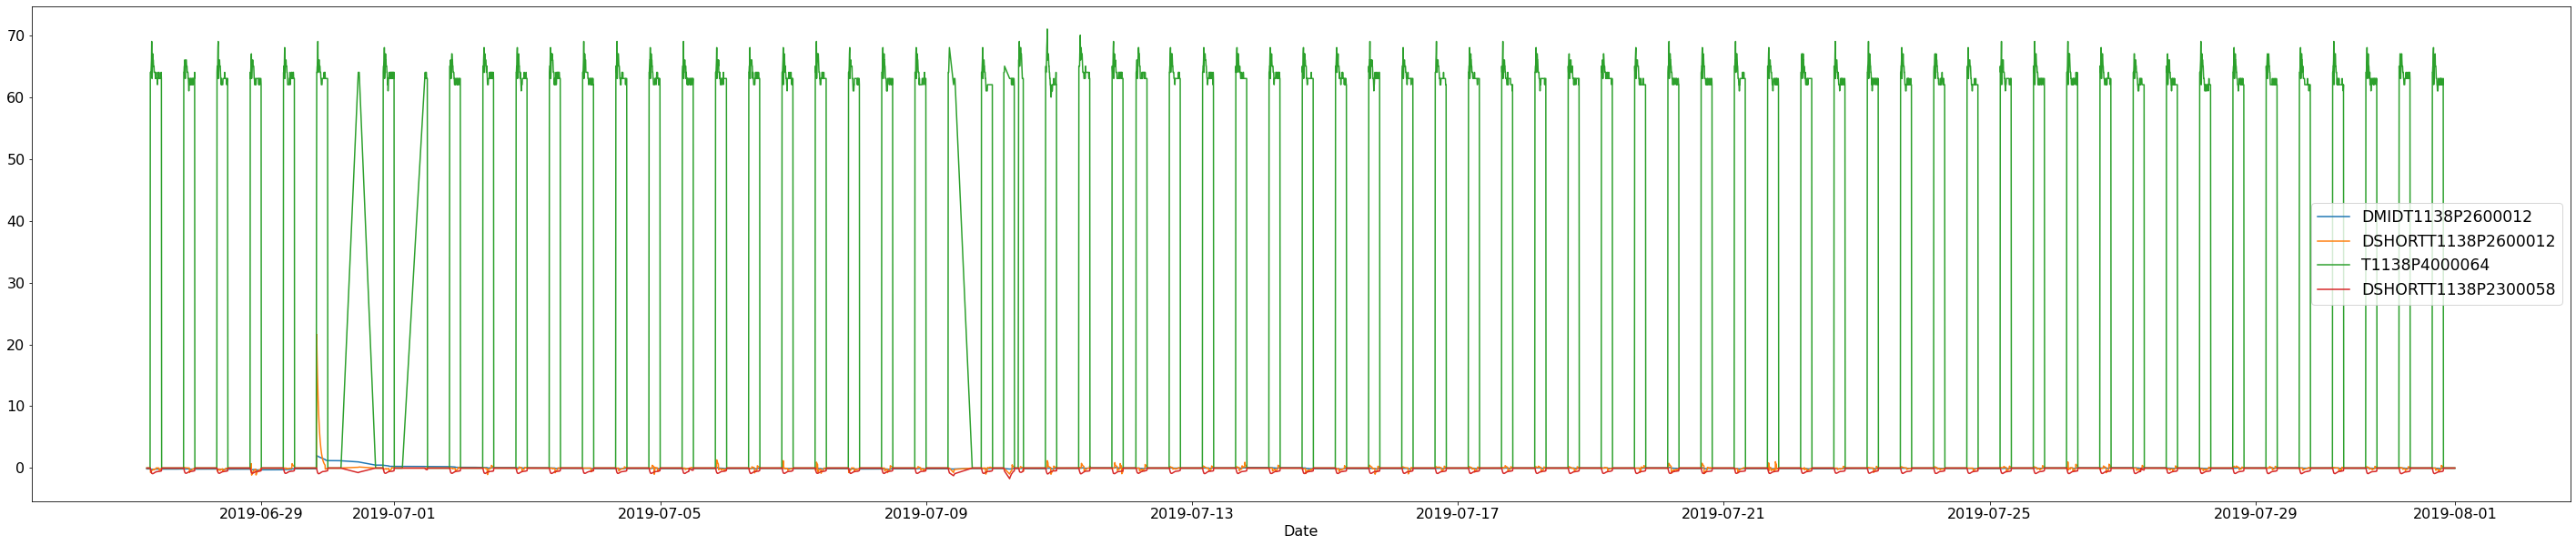

In [ ]:
plot_chart(well_2, data, var_str = ['DMIDT1138P2600012', 'DSHORTT1138P2600012', 'T1138P4000064', 'DSHORTT1138P2300058'])

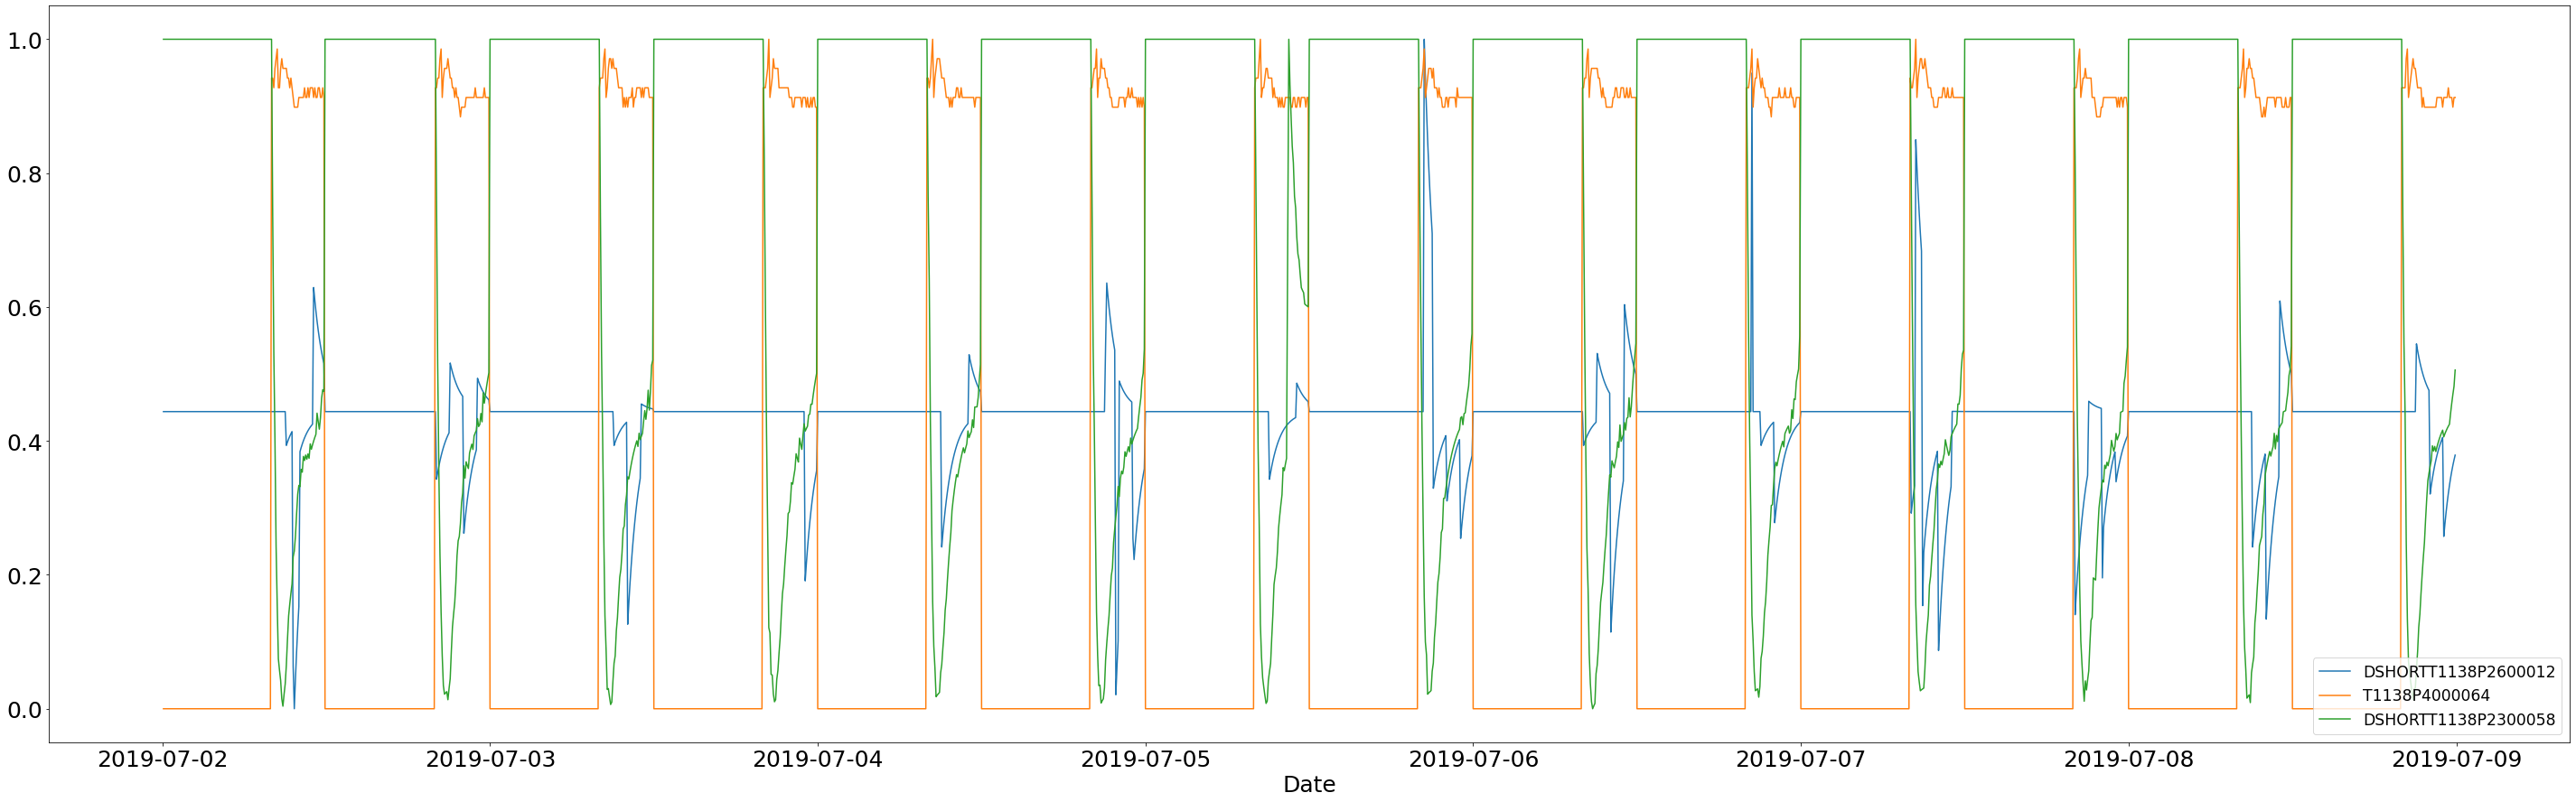

In [ ]:
plot_chart(well_2, data.where( (data['DT'] < '2019-07-09 00:00:00') & (data['DT'] > '2019-07-02 00:00:00') ), var_str = ['DSHORTT1138P2600012', 'T1138P4000064', 'DSHORTT1138P2300058'], norm = True)

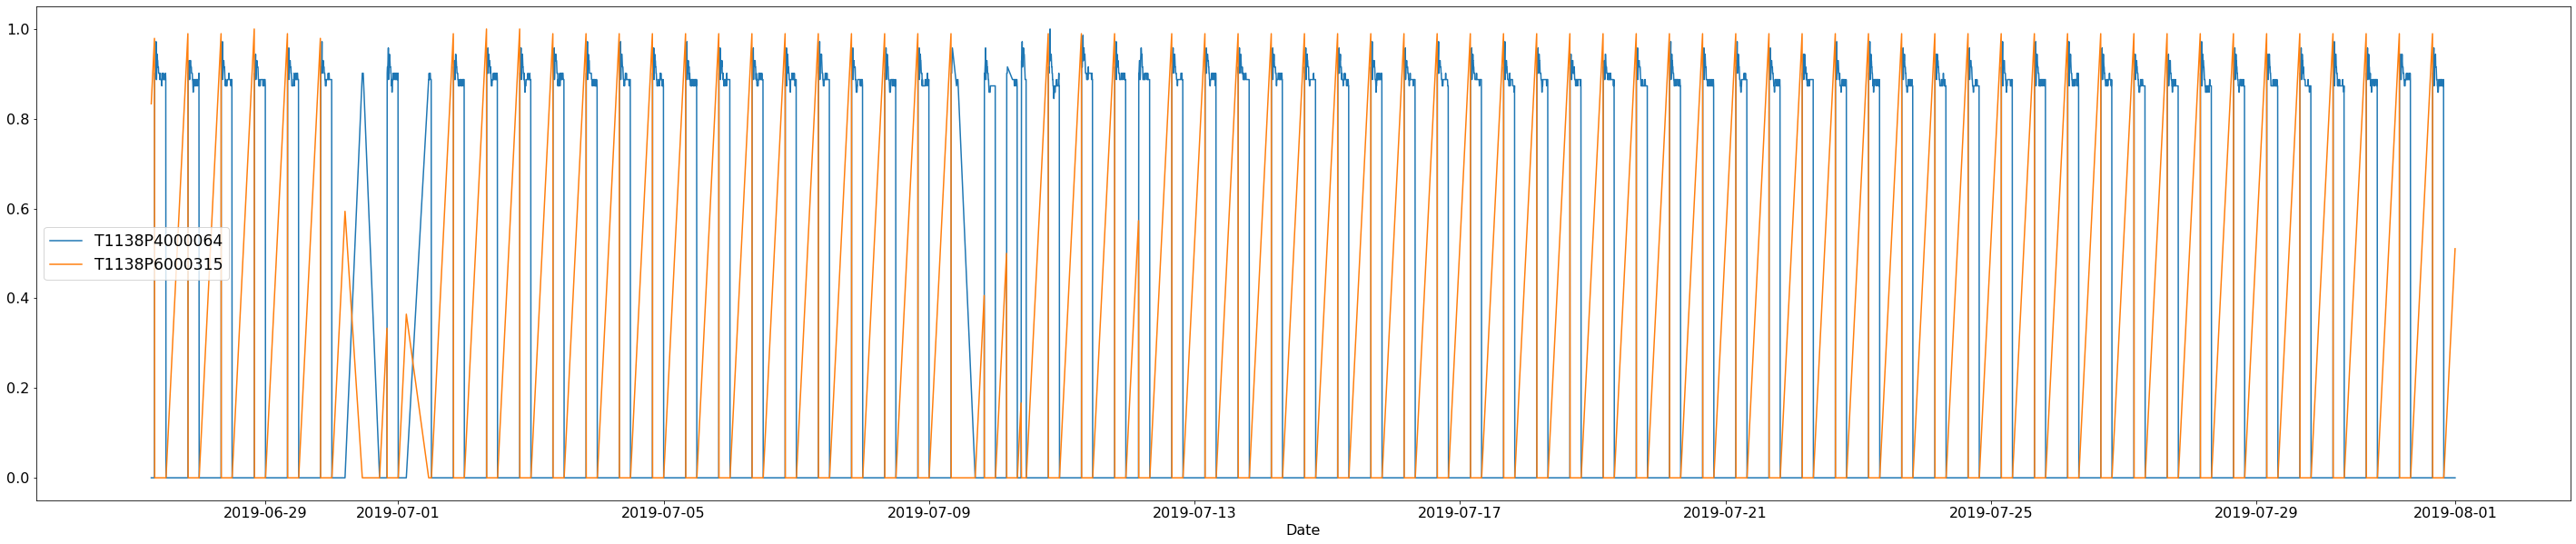

In [ ]:
plot_chart(well_2, data, var_str = ['T1138P4000064', 'T1138P6000315'], norm = True)

####  Корреляционная матрица

In [ ]:
# WELL with index [2]
numdata = data[data['WELL_ID'] == well_2]._get_numeric_data()
corr_df = numdata.corr()

<ipython-input-18-ca11023c8703>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))


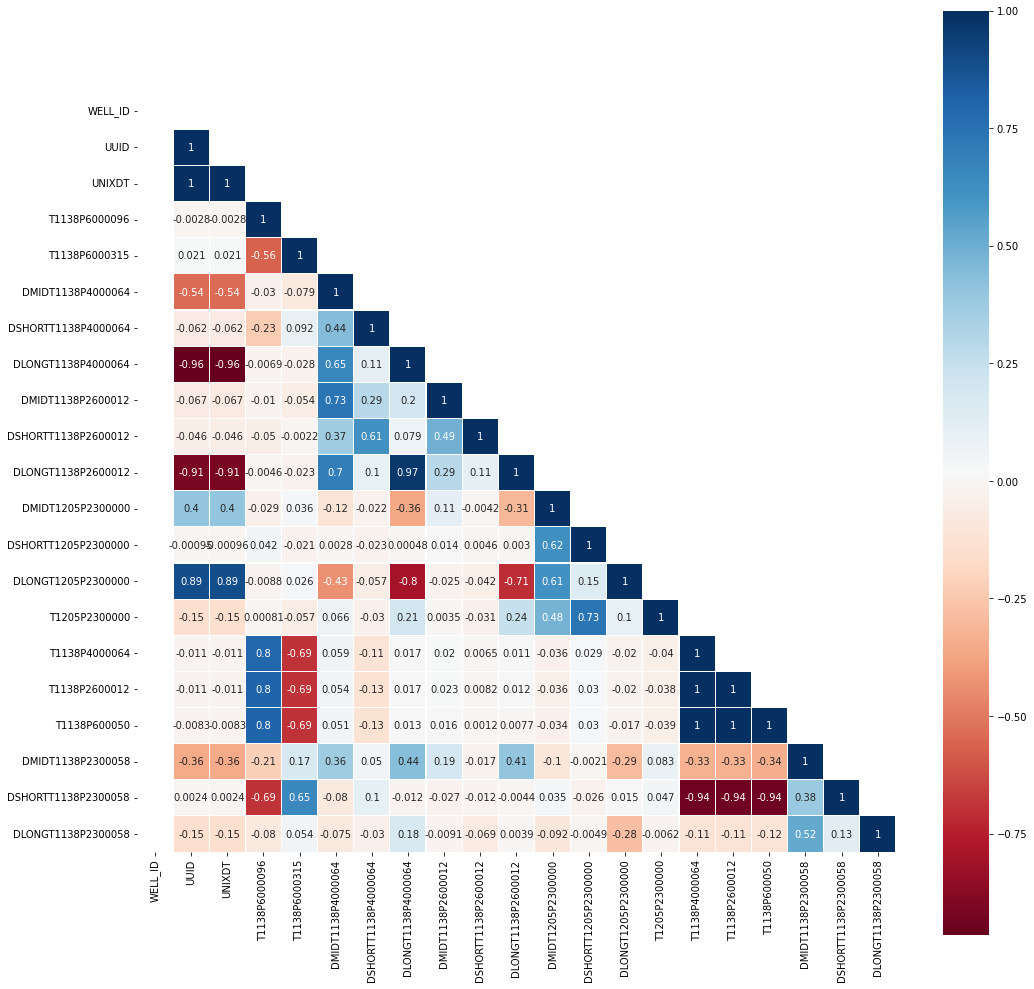

In [ ]:
colormap = plt.cm.RdBu
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize=(17,17))
hmap=sns.heatmap(df_lt,linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, ax=ax)

#### Data preparation 

In [ ]:
# Features & Explanatory variable
dct = {}
for i in range(len(wells)):
  well = data['WELL_ID'].unique()[i]
  x = data[data['WELL_ID'] == well]
  globals()[f'y_{i+1}'] = x['DMIDT1138P2300058'] / 24 
  globals()[f'X_{i+1}'] = x.drop(['DMIDT1138P2300058', 'DSHORTT1138P2300058', 'DLONGT1138P2300058'], axis = 1)

  dct[str(i+1)] = [globals()[f'X_{i+1}'], globals()[f'y_{i+1}']] # X & y values for the corresponding Well

In [ ]:
# dct['1'][0]

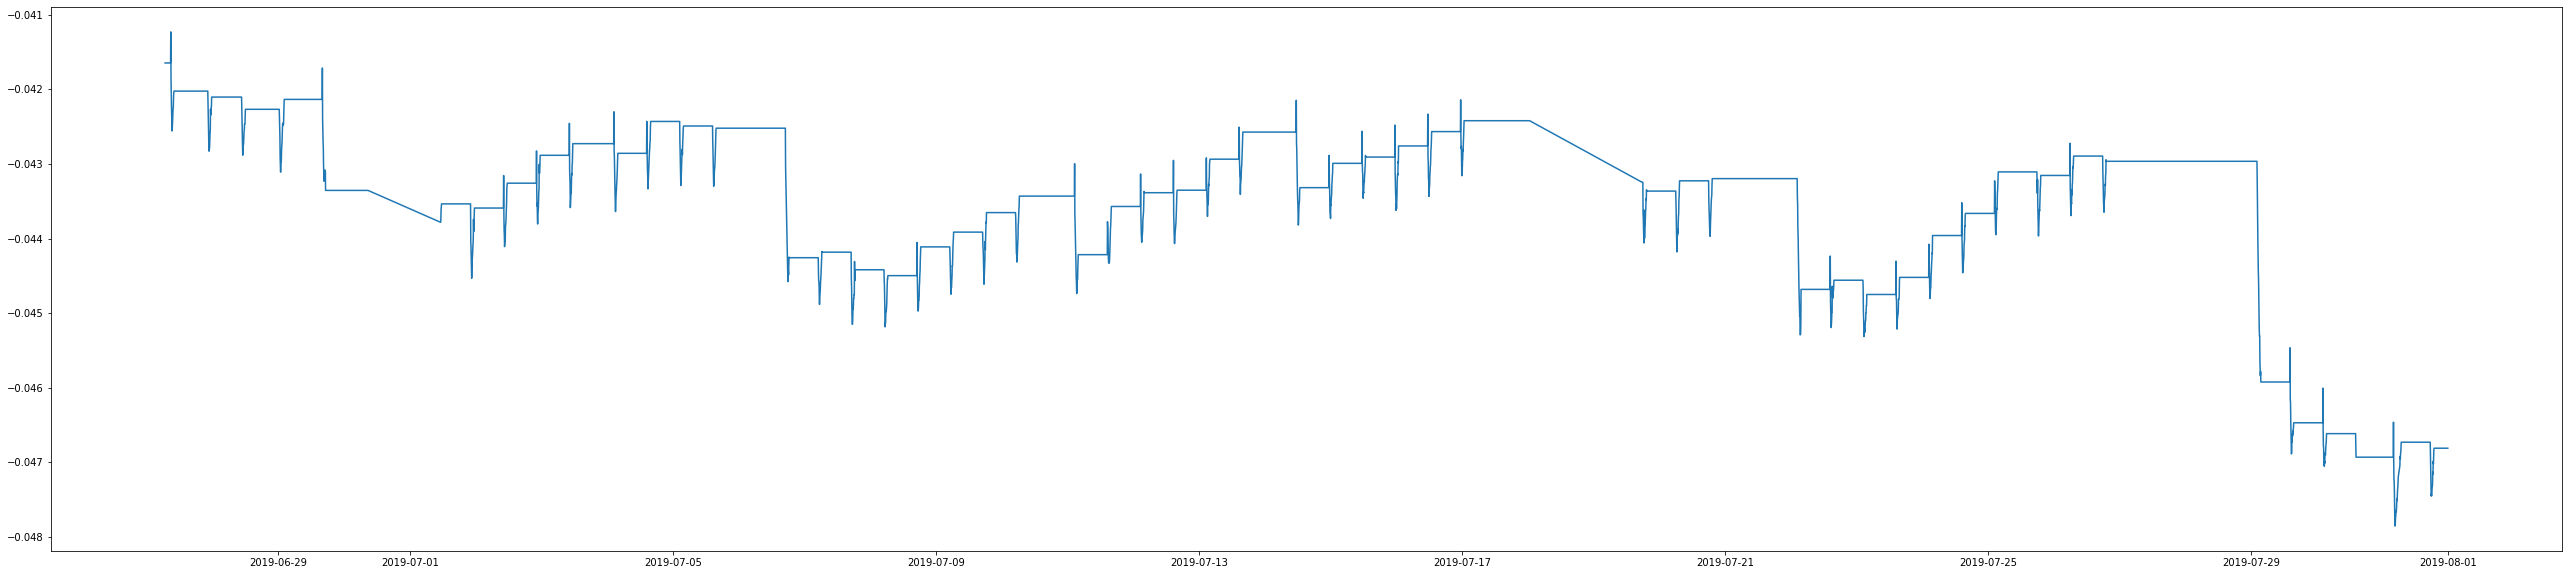

In [ ]:
fig = plt.figure(figsize=(45,10))  

plt.plot(X_5['DT'], y_5, label = "DSHORTT1138P2300058")

#### Hyperopt [[1](https://www.kaggle.com/code/eikedehling/tune-and-compare-xgb-lightgbm-rf-with-hyperopt/notebook), [2](https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e), [3](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)]

* LGBM 
* RF
* Linear regression

In [ ]:
### models
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
###

### optimization and metric
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.metrics import mean_absolute_error
###

### Linear model ###
from sklearn.linear_model import Ridge


In [ ]:
# LightGBM parameters
lgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.5, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 32, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 10, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.9, 0.05)),
    'subsample':        hp.uniform('subsample', 0.5, 0.99),
    'n_estimators':     100,
}
lgb_fit_params = {
    'eval_metric': 'l2',
    'early_stopping_rounds': 10,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: mean_absolute_error(y, pred)

In [ ]:
# RF parameters
rf_reg_params = {
    'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 5, 1)),
    'min_samples_split': hp.choice('min_samples_split', np.arange(2, 10, 1)),
    'max_depth': hp.choice('max_depth',        np.arange(5, 32, 1, dtype=int)),
    'max_features': hp.choice('max_features', np.arange(0.1, 1, 0.05)),
    'n_estimators': hp.choice('learning_rate', np.arange(2, 20, 1))
}
rf_fit_params = {
    'eval_metric': 'auc',
    'early_stopping_rounds': 10,
    'verbose': False
}
rf_para = dict()
rf_para['reg_params'] = rf_reg_params
rf_para['fit_params'] = rf_fit_params
rf_para['loss_func' ] = lambda y, pred: mean_absolute_error(y, pred)

In [ ]:
class HPOpt(object):

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test  = X_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg_lgb(reg, para)


    def train_reg_lgb(self, reg, para):
        reg.fit(self.X_train, self.y_train,
                eval_set=[(self.X_train, self.y_train), (self.X_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.X_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

    def rf_reg(self, para):
      reg = RandomForestRegressor(**para['reg_params'])
      return self.train_reg_rf(reg, para)

    def train_reg_rf(self, reg, para):
        reg.fit(self.X_train, self.y_train)
        pred = reg.predict(self.X_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

#### Cross Validation

In [ ]:
tscv = model_selection.TimeSeriesSplit(max_train_size=None, n_splits=3)

dct_cv = {}

for k in dct.keys():
  
  # 2nd half of the customized CV
  X_2 = dct[k][0].where(dct[k][0]['DT'] > '2019-07-15 00:00:00').dropna()
  y_2 = dct[k][1].where(dct[k][0]['DT'] > '2019-07-15 00:00:00').dropna()


  # 1st half of the customized CV
  X_1 = dct[k][0].where(dct[k][0]['DT'] < '2019-07-15 00:00:00').dropna()
  y_1 = dct[k][1].where(dct[k][0]['DT'] < '2019-07-15 00:00:00').dropna()
  

  # train-test split
  dct_cv[k] = []
  for train_index, test_index in tscv.split(X_2):
    # print(train_index, test_index)
    X_train, X_test = pd.concat([ X_1, X_2.iloc[train_index] ], axis = 0), X_2.iloc[test_index]
    y_train, y_test = pd.concat([ y_1, y_2.iloc[train_index] ], axis = 0), y_2.iloc[test_index]
    
    dct_cv[k].append([X_train, X_test, y_train, y_test])

In [ ]:
dct_cv['2'][1][0]

,WELL_ID,UUID,DT,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,DSHORTT1138P2600012,DLONGT1138P2600012,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050
14879,226003316.0,2.260033e+17,2019-07-14 23:55:00,1.563148e+09,7800.0,0.0,-0.005433,-0.034259,0.013523,-0.082857,-0.193246,-0.068339,-0.007596,0.009645,-0.004161,1.159335,62.0,19.0,0.724
14880,226003316.0,2.260033e+17,2019-07-14 23:50:00,1.563148e+09,7500.0,0.0,-0.005488,-0.038065,0.013537,-0.083693,-0.214718,-0.068407,-0.008976,-0.003619,-0.004294,1.148583,62.0,19.0,0.722
14881,226003316.0,2.260033e+17,2019-07-14 23:45:00,1.563148e+09,7200.0,0.0,-0.005543,-0.042295,0.013550,-0.084539,-0.238575,-0.068476,-0.009244,-0.005977,-0.004316,1.147116,62.0,19.0,0.719
14882,226003316.0,2.260033e+17,2019-07-14 23:40:00,1.563148e+09,6900.0,0.0,-0.005599,-0.046994,0.013564,-0.085393,-0.265084,-0.068544,-0.009219,-0.005337,-0.004309,1.148094,62.0,19.0,0.718
14883,226003316.0,2.260033e+17,2019-07-14 23:35:00,1.563147e+09,6600.0,0.0,-0.005656,-0.052216,0.013577,-0.086255,-0.294537,-0.068613,-0.009312,-0.005930,-0.004313,1.148094,62.0,19.0,0.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,226003316.0,2.260033e+17,2019-07-23 12:25:00,1.563885e+09,0.0,10500.0,0.032032,0.000000,-0.024015,0.016720,0.000000,-0.029673,0.005093,0.000000,-0.005323,1.135875,0.0,0.0,0.000
12430,226003316.0,2.260033e+17,2019-07-23 12:20:00,1.563884e+09,0.0,10200.0,0.032032,0.000000,-0.024015,0.016720,0.000000,-0.029673,0.005093,0.000000,-0.005323,1.134409,0.0,0.0,0.000
12431,226003316.0,2.260033e+17,2019-07-23 12:15:00,1.563884e+09,0.0,9900.0,0.032032,0.000000,-0.024015,0.016720,0.000000,-0.029673,0.005093,0.000000,-0.005323,1.136853,0.0,0.0,0.000
12432,226003316.0,2.260033e+17,2019-07-23 12:10:00,1.563884e+09,0.0,9600.0,0.032032,0.000000,-0.024015,0.016720,0.000000,-0.029673,0.005093,0.000000,-0.005323,1.152982,0.0,0.0,0.000


#### Implementation

In [ ]:
res_dct = {}
res_l2 = {}

for k in dct_cv.keys():
  print(f'Well number {k}')
  
  res_dct[k] = []
  res_l2[k] = []
  for i in range(3):
    # print(i)
    X_train1 = dct_cv[k][i][0].loc[:, dct_cv[k][i][0].columns != 'DT']
    X_test1 = dct_cv[k][i][1].loc[:, dct_cv[k][i][1].columns != 'DT']
    # print(X_train1.shape, X_test1.shape)

    obj = HPOpt(X_train1, X_test1, dct_cv[k][i][2], dct_cv[k][i][3])
    lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)
    # print(lgb_opt[0])

    rf_opt = obj.process(fn_name='rf_reg', space=rf_para, trials=Trials(), algo=tpe.suggest, max_evals=100)
    # print(rf_opt[0])

    model = Ridge(alpha=1.0)
    model.fit(X_train1.fillna(X_train1.mean()), dct_cv[k][i][2].fillna(dct_cv[k][i][2].mean()))
    y_pred = pd.Series(model.predict(X_test1), index=X_test1.index)
    mape = mean_absolute_error(dct_cv[k][i][3], y_pred)*100
    res_l2[k] = model.coef_
    # print(mape)
    
    res_dct[k].append([i, lgb_opt[0], rf_opt[0], mape] )

Well number 1
  1%|          | 1/100 [00:00<00:14,  6.89it/s, best loss: 0.0002667751492078305]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.19462e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:12,  7.73it/s, best loss: 0.00010086658184225261]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.88739e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:19<00:00,  5.10it/s, best loss: 9.04063810576658e-05]
Well number 2
  1%|          | 1/100 [00:00<00:11,  8.48it/s, best loss: 0.0007804907543954578]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.81582e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:11,  8.91it/s, best loss: 0.0008724216524775986]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.60636e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.39417e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:18<00:00,  5.50it/s, best loss: 0.00032938066496590644]
Well number 3
  1%|          | 1/100 [00:00<00:14,  6.77it/s, best loss: 0.0002264635043159018]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.63826e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:14,  6.79it/s, best loss: 0.00016391142097220486]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.85374e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.67118e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:23<00:00,  4.33it/s, best loss: 0.00018430388260909684]
Well number 4
  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.15171e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:15,  6.59it/s, best loss: 0.0024629113853023923]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.01202e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.66987e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:23<00:00,  4.31it/s, best loss: 0.00022477978327977135]
Well number 5
  1%|          | 1/100 [00:00<00:12,  8.25it/s, best loss: 0.0002955145840704683]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.15209e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:10,  9.35it/s, best loss: 0.0004955591669749232]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.38225e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.03944e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:12<00:00,  8.22it/s, best loss: 0.0003295360311242771]
Well number 6


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.36755e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.31438e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.33008e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:13<00:00,  7.26it/s, best loss: 8.229889126826246e-05]
Well number 7
  1%|          | 1/100 [00:00<00:16,  5.88it/s, best loss: 0.0003501055280576159]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.36575e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:13,  7.52it/s, best loss: 0.0006268524289431174]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.68865e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.27551e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:15<00:00,  6.54it/s, best loss: 0.00016412767102493253]
Well number 8
  1%|          | 1/100 [00:00<00:11,  8.27it/s, best loss: 0.000777718030723103]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.73924e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s, best loss: 0.0010347635264058978]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.01862e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.75434e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:18<00:00,  5.55it/s, best loss: 0.0002511739593603254]
Well number 9
  1%|          | 1/100 [00:00<00:11,  8.76it/s, best loss: 0.0010514856039274328]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.17621e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:10,  9.29it/s, best loss: 0.0009640241351161345]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.51723e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:11,  8.58it/s, best loss: 0.0008090299495796148]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.70685e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:19<00:00,  5.18it/s, best loss: 0.0005294409633588444]
Well number 10
  1%|          | 1/100 [00:00<00:12,  7.62it/s, best loss: 0.0005359117956338987]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.29024e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:12,  7.77it/s, best loss: 0.0005506335047364364]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.82453e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:14,  6.67it/s, best loss: 0.0011777120199527298]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.67414e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:11<00:00,  9.00it/s, best loss: 0.001189014261810872]
Well number 11
  1%|          | 1/100 [00:00<00:12,  8.23it/s, best loss: 0.0007092189976778704]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.17911e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:05<00:00, 18.41it/s, best loss: 0.004587740334294944]
Well number 12
  1%|          | 1/100 [00:00<00:09,  9.91it/s, best loss: 0.00027230561886257634]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.59587e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:13,  7.54it/s, best loss: 0.0005270054726903454]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.7962e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:16<00:00,  6.02it/s, best loss: 0.00046801863033053804]
Well number 13
  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.73777e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.68796e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  2%|▏         | 2/100 [00:00<00:06, 14.47it/s, best loss: 0.0002872170311161742]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.27713e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:17<00:00,  5.56it/s, best loss: 0.00013513190704413455]
Well number 14
  1%|          | 1/100 [00:00<00:17,  5.79it/s, best loss: 0.00015750867246763027]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.74093e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.91552e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.11925e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:24<00:00,  4.14it/s, best loss: 8.607415589342906e-05]
Well number 15
  1%|          | 1/100 [00:00<00:15,  6.39it/s, best loss: 0.0002531315840542604]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.65543e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.68366e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.27304e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:21<00:00,  4.55it/s, best loss: 0.0001045649042067467]
Well number 16
  1%|          | 1/100 [00:00<00:12,  7.88it/s, best loss: 0.0003110351268305906]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.73708e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.69322e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:13,  7.40it/s, best loss: 0.0003097316620326354]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.78985e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:24<00:00,  4.03it/s, best loss: 0.00020006488528264294]
Well number 17
  1%|          | 1/100 [00:00<00:15,  6.39it/s, best loss: 0.00032365589934970767]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.37164e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:15,  6.35it/s, best loss: 0.0005408355720460401]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.68928e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


  1%|          | 1/100 [00:00<00:11,  8.26it/s, best loss: 0.0004929820553008151]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.27797e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


100%|██████████| 100/100 [00:21<00:00,  4.55it/s, best loss: 0.0004165291811682452]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.74301e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
# res_dct

In [ ]:
lgb_dct = {}
lgb_key = res_dct['1'][0][1].keys()
for k in res_dct.keys():
  ### avg parameters ###
  res = [sum(x) for x in zip(res_dct[k][0][1].values(), res_dct[k][1][1].values(), res_dct[k][2][1].values())]
  res[0:2] = [ i//3 for i in res[0:2] ]
  if res[0]/10 == 0:
    res[0] = 0.1
  else:
    res[0] = res[0]/10
  res[1] = res[1]/100 
  res[3] = res[3]//3
  res[4] = res[4]/3

  ###  ###
  lgb_dct[k] = dict(zip(lgb_key, res))

# lgb_dct

In [ ]:
import math

rf_dct = {}
rf_key = list(res_dct['1'][0][2].keys())
rf_key[0] = 'n_estimators'
for k in res_dct.keys():
  ### avg parameters ###
  res = [sum(x) for x in zip(res_dct[k][0][2].values(), res_dct[k][1][2].values(), res_dct[k][2][2].values())]
  if res[0]//3 != 0:
    res[0] = res[0]//3
  else:
    res[0] = 1
  res[1] = res[1]//3
  res[2] = res[2]/300
  if res[3] < 3:
    res[3] = 1
  else: 
    res[3] = res[3]//3
  if res[4]//3 <= 1:
    res[4] = 3
  else:
    res[4] = res[4]//3
  ###  ###
  rf_dct[k] = dict(zip(rf_key, res))

# rf_dct

In [ ]:
rf_dct['14']

{'n_estimators': 4,
 'max_depth': 10,
 'max_features': 0.14,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

#### fit-predict

In [ ]:
k = '14'
X_train = dct_cv[k][1][0].loc[:, dct_cv[k][1][0].columns != 'DT']
X_test = dct_cv[k][1][1].loc[:, dct_cv[k][1][1].columns != 'DT']

In [ ]:
model = lgb.LGBMRegressor(**lgb_dct[k]) #(colsample_bytree = 0.5, learning_rate = 0.09, max_depth = 12, min_child_weight = 0.961057083181399) 
model.fit(X_train, dct_cv[k][1][2].fillna(dct_cv[k][1][2].mean()))
print(); print(model)

expected_y  = dct_cv[k][1][3]
predicted_y = model.predict(X_test)

lgb_mape = mean_absolute_error(expected_y, predicted_y)
print(lgb_mape)


LGBMRegressor(learning_rate=0.05, max_depth=32, min_child_weight=3,
              subsample=0.7017945545621674)
0.00026779816073920534


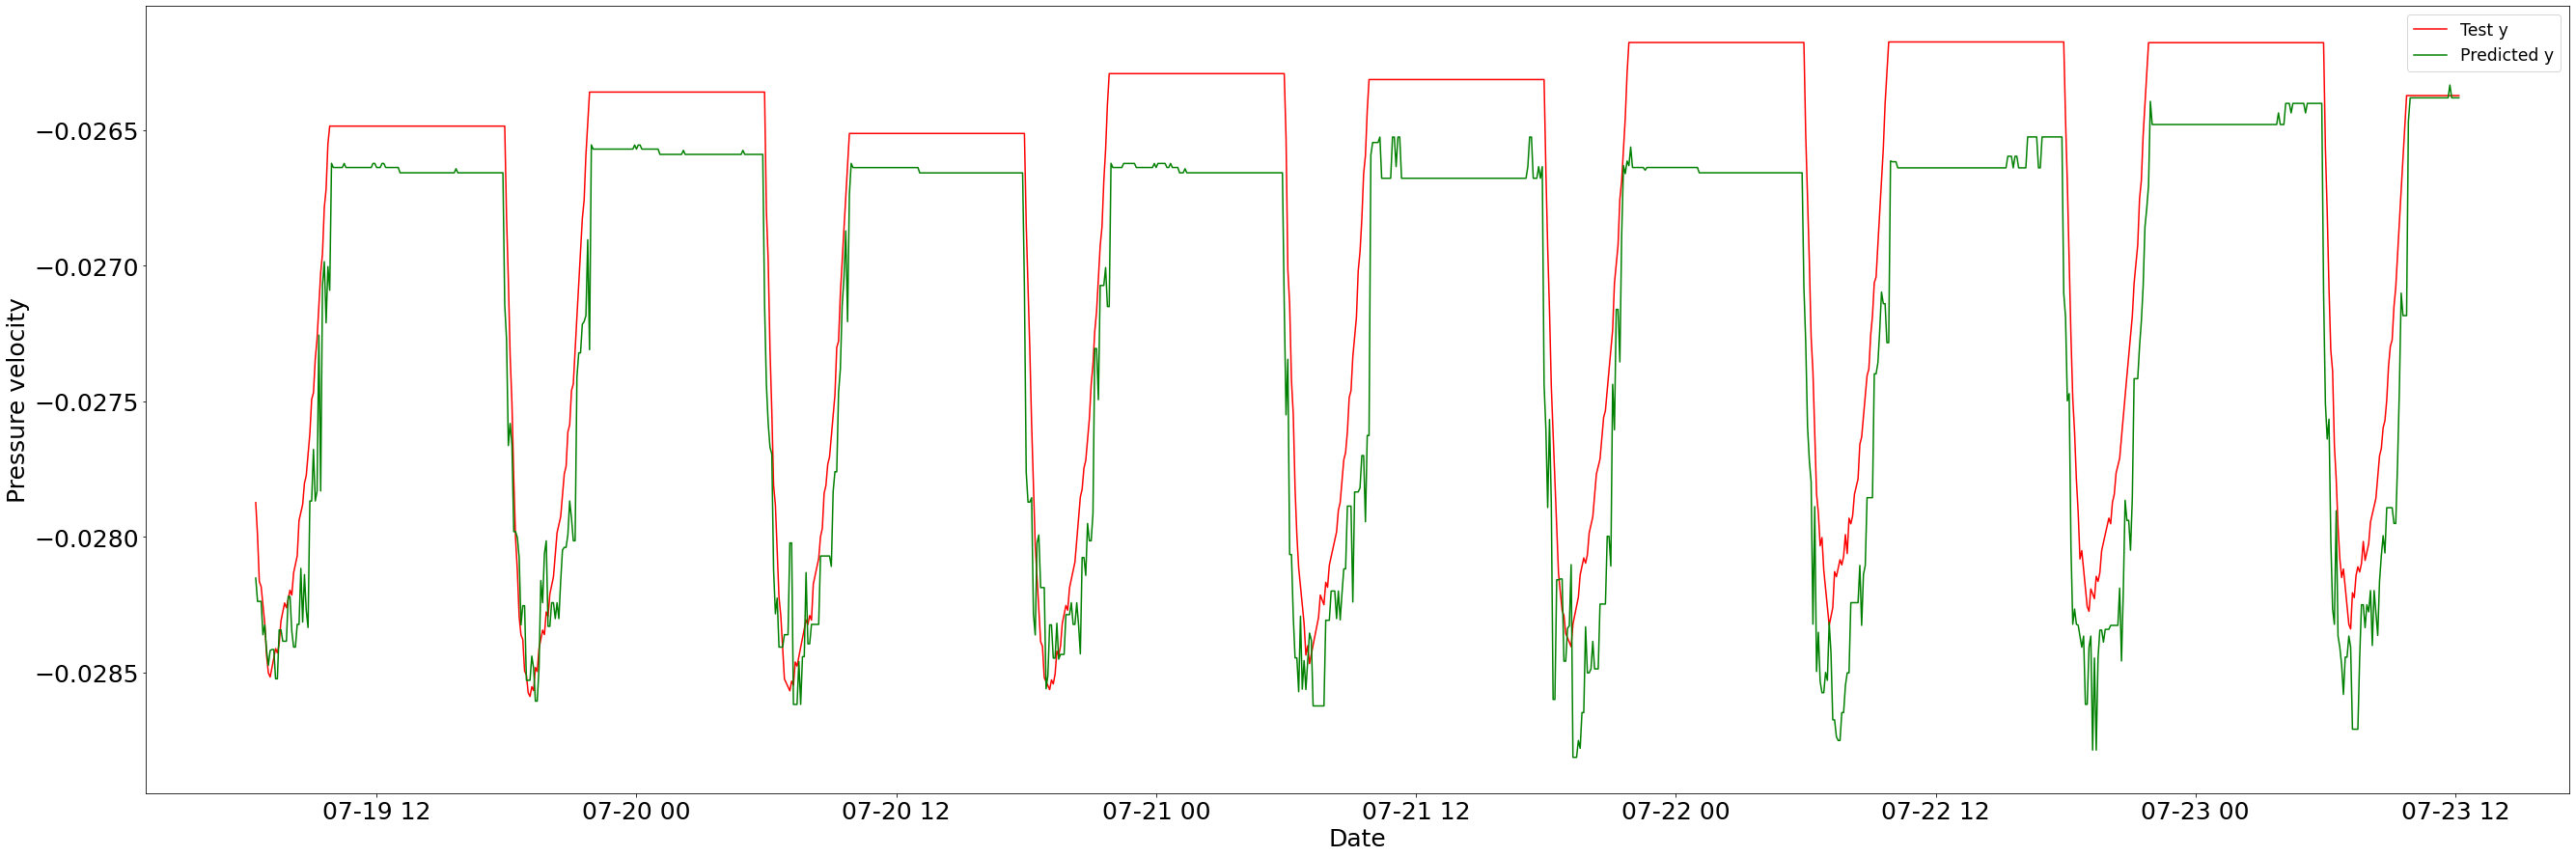

In [ ]:
fig = plt.figure(figsize=(45,15))  

plt.plot(dct_cv[k][1][1]['DT'], expected_y, color='r', label='Test y')
plt.plot(dct_cv[k][1][1]['DT'], predicted_y, color='g', label='Predicted y')
# plt.ylim([-0.0295, -0.024])
plt.legend(fontsize = 'xx-large')
# plt.title(f'LGB forecast for WELL {k}', fontsize = 'xx-large')
plt.xlabel("Date", size = 25)
plt.xticks(fontsize=25,)
plt.ylabel("Pressure velocity", size = 25)
plt.yticks(fontsize=25,)
plt.show()
# fig.savefig('/content/drive/MyDrive/Programming/Centrifugal Pumps Maintenance/lgb_14.png', dpi=300)

In [ ]:
model = RandomForestRegressor(**rf_dct[k])
model.fit(X_train, dct_cv[k][1][2].fillna(dct_cv[k][1][2].mean()))
print(); print(model)

expected_y  = dct_cv[k][1][3]
predicted_y = model.predict(X_test)
rf_mape = mean_absolute_error(expected_y, predicted_y)
print(rf_mape)


RandomForestRegressor(max_depth=10, max_features=0.14, min_samples_leaf=2,
                      n_estimators=4)
0.00025857781100022906


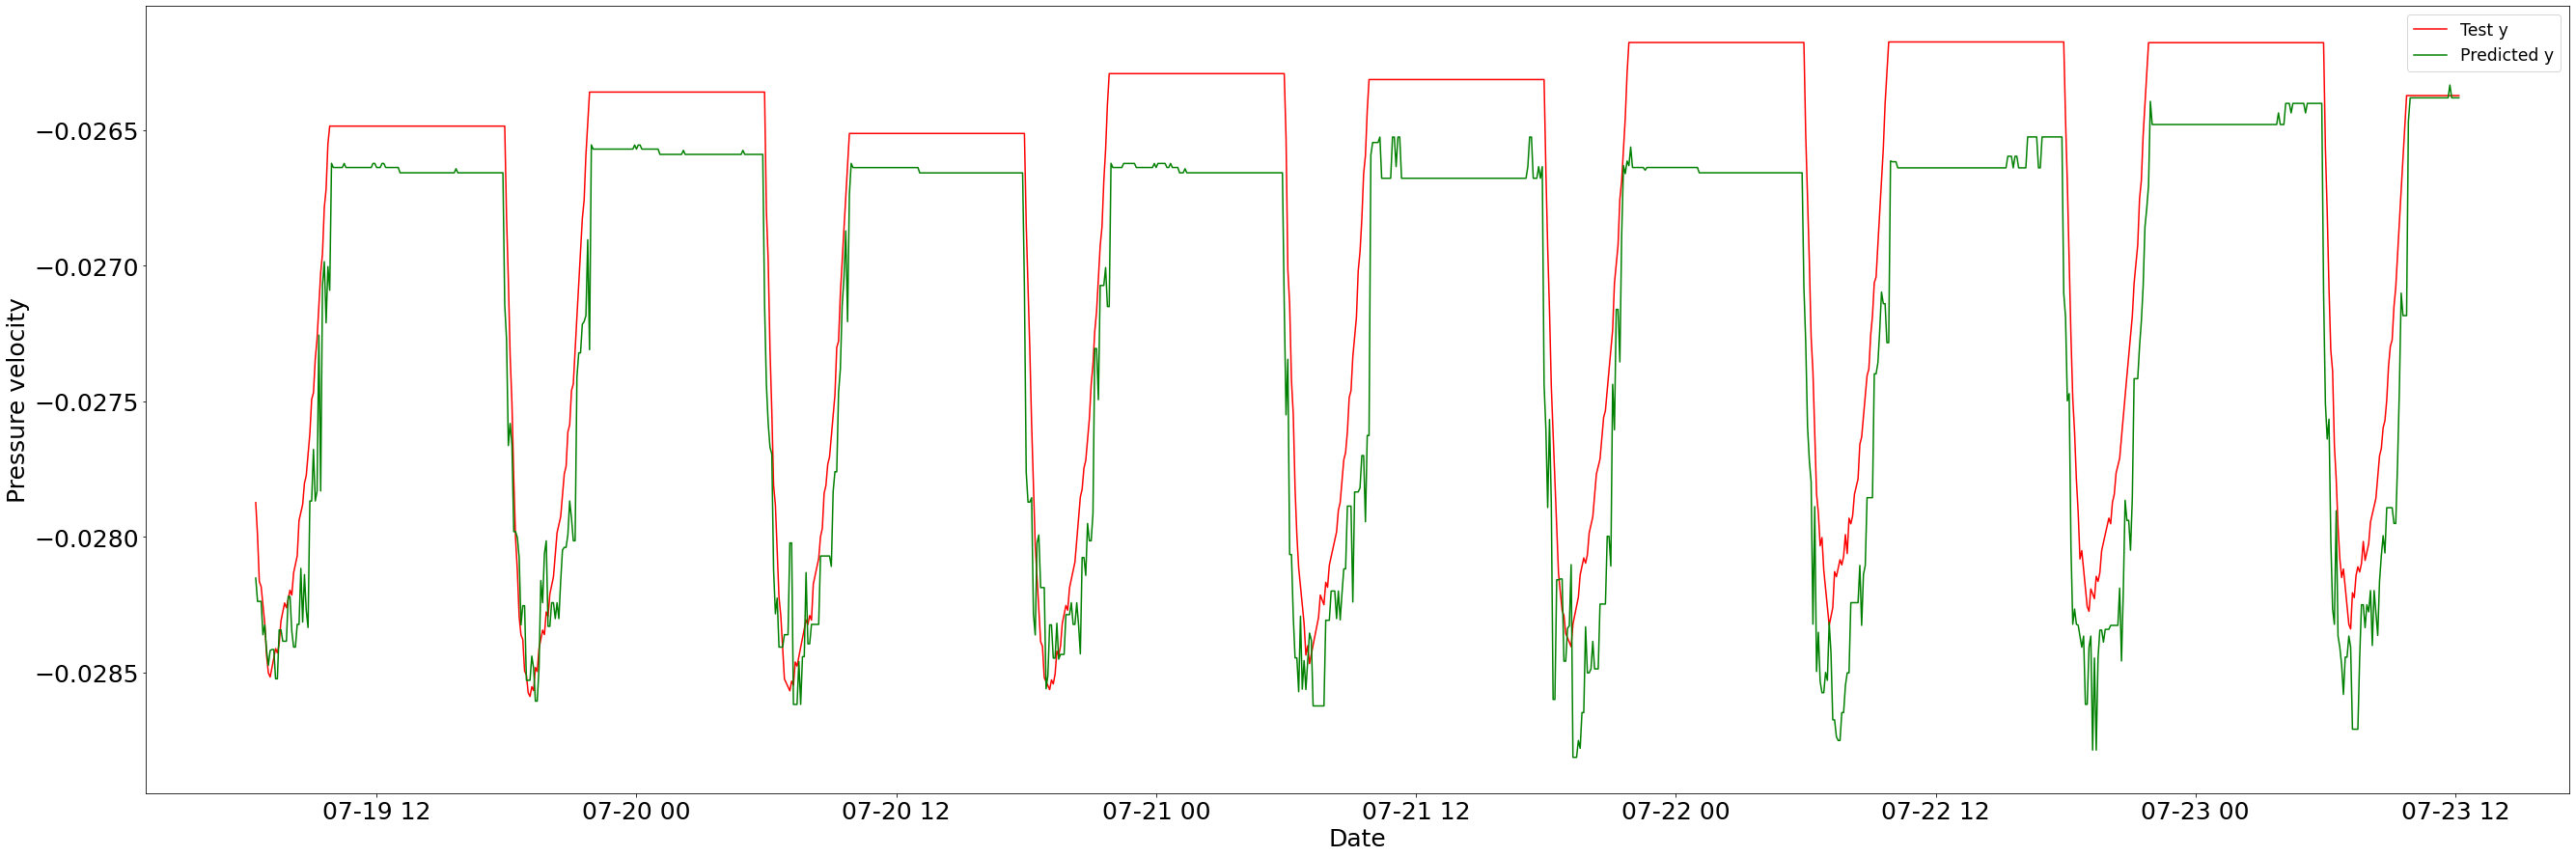

In [ ]:
fig = plt.figure(figsize=(45,15))  

plt.plot(dct_cv[k][1][1]['DT'], expected_y, color='r', label='Test y')
plt.plot(dct_cv[k][1][1]['DT'], predicted_y, color='g', label='Predicted y')
# plt.ylim([-0.0295, -0.024])
plt.legend(fontsize = 'xx-large')
# plt.title(f'RF forecast for WELL {k}', fontsize = 'xx-large')
plt.xlabel("Date", size = 25)
plt.xticks(fontsize=25,)
plt.ylabel("Pressure velocity", size = 25)
plt.yticks(fontsize=25,)
plt.show()

#### MAPE

In [ ]:
### LGB 
lgb_mape = 0
lgb_mape_well = {}
for k in res_dct.keys():
  X_train = dct_cv[k][1][0].loc[:, dct_cv[k][1][0].columns != 'DT']
  X_test = dct_cv[k][1][1].loc[:, dct_cv[k][1][1].columns != 'DT']

  model = lgb.LGBMRegressor(**lgb_dct[k]) 
  model.fit(X_train, dct_cv[k][1][2].fillna(dct_cv[k][1][2].mean()))
  # print(); print(model)

  expected_y  = dct_cv[k][1][3]
  predicted_y = model.predict(X_test)
  mape = mean_absolute_error(expected_y, predicted_y)
  lgb_mape_well[k] = round(100*mape, 3)
  lgb_mape += mape
  # print(lgb_mape)

In [ ]:
# lgb_mape_well

In [ ]:
lgb_mape_avg = 100*lgb_mape/17
print(lgb_mape_avg)

0.0796088249545796


In [ ]:
### RF
rf_mape = 0
rf_mape_well = {}
for k in res_dct.keys():
  X_train = dct_cv[k][1][0].loc[:, dct_cv[k][1][0].columns != 'DT']
  X_test = dct_cv[k][1][1].loc[:, dct_cv[k][1][1].columns != 'DT']

  model = RandomForestRegressor(**rf_dct[k]) 
  model.fit(X_train, dct_cv[k][1][2].fillna(dct_cv[k][1][2].mean()))
  # print(); print(model)

  expected_y  = dct_cv[k][1][3]
  predicted_y = model.predict(X_test)
  mape = mean_absolute_error(expected_y, predicted_y)
  rf_mape_well[k] = round(100*mape, 3)
  rf_mape += mape
  # print(rf_mape)

In [ ]:
# rf_mape_well

In [ ]:
rf_mape_avg = 100*rf_mape/17
print(rf_mape_avg)

0.08416543130638994


In [ ]:
### Ridge regression
MAPE_avg = sum([res_dct[k][0][3] for k in res_dct.keys()])/17
print(MAPE_avg)

0.08553674959397527


In [ ]:
model.get_params()

#### PCA [[1](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60), [2](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)]

In [ ]:
### WELL with index [2]

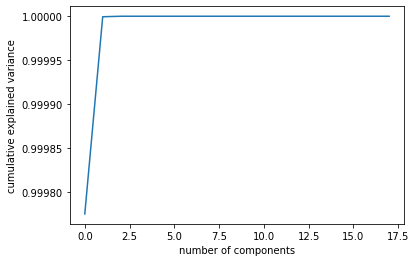

In [ ]:
pca = PCA().fit(X_5.loc[:, X_5.columns != 'DT'])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_5.loc[:, X_5.columns != 'DT'])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf['DT'] = X_5['DT']

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,DT
0,2.168335e+06,-4927.436604,-419.551014,NaT
1,2.167896e+06,-5227.181090,-425.023581,NaT
2,2.167480e+06,-5526.936192,-430.499625,NaT
3,2.167042e+06,-5826.680678,-435.972192,NaT
4,2.166626e+06,-6126.435780,-441.448237,NaT


#### [tsfresh](https://tsfresh.readthedocs.io/en/latest/)

In [ ]:
#!pip install tsfresh

In [ ]:
# X = tsfresh.extract_features(data, column_id='WELL_ID', column_sort='DT', default_fc_parameters=tsfresh.feature_extraction.EfficientFCParameters())

In [ ]:
# X.head(5)

#### Grouped data

In [ ]:
# усреднённые данные по каждой скважине
# data_grouped = data.groupby(['DT'], as_index = False).mean()
# data_grouped.head(5)

In [ ]:
# y_gr1 = min_max_norm(data_grouped['DMIDT1138P2600012'])
# y_gr2 = min_max_norm(data_grouped['DSHORTT1138P2600012'])
# y_gr3 = min_max_norm(data_grouped['T1138P4000064'])
# y_gr4 = min_max_norm(data_grouped['DSHORTT1138P2300058'])

In [ ]:
# data_grouped['DMIDT1138P2600012'] = min_max_norm(data_grouped['DMIDT1138P2600012'])
# data_grouped['DSHORTT1138P2600012'] = min_max_norm(data_grouped['DSHORTT1138P2600012'])
# data_grouped['T1138P4000064'] = min_max_norm(data_grouped['T1138P4000064'])
# data_grouped['DSHORTT1138P2300058'] = min_max_norm(data_grouped['DSHORTT1138P2300058'])

In [ ]:
# fig = plt.figure(figsize=(50,10))  

# plt.plot(data_grouped['DT'], y_gr1, label = "DMIDT1138P2600012")
# plt.plot(data_grouped['DT'], y_gr2, label = "DSHORTT1138P2600012")
# plt.plot(data_grouped['DT'], y_gr3, label = "T1138P4000064")
# plt.plot(data_grouped['DT'], y_gr4, label = "DSHORTT1138P2300058")
# plt.legend()
# plt.show()

In [ ]:
# # время простоя + % загрузки
# y_gr_load = min_max_norm(data_grouped['T1138P4000064'])
# y_gr2_chill = min_max_norm(data_grouped['T1138P6000315'])

# fig = plt.figure(figsize=(50,10))  

# plt.plot(data_grouped['DT'], y_gr_load, label = "Загрузка двигателя, %") # Загрузка двигателя, %
# plt.plot(data_grouped['DT'], y_gr2_chill, label = "Время простоя двигателя") # Время простоя двигателя
# plt.legend()
# plt.show()

In [ ]:
# numdata = data._get_numeric_data()
# corr_df = numdata.corr()
# corr_df

In [ ]:
# colormap = plt.cm.RdBu
# df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
# fig, ax = plt.subplots(figsize=(17,17))
# hmap=sns.heatmap(df_lt,linewidths=0.1, vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white', annot=True, ax=ax)

In [ ]:
# pca = PCA().fit(X.loc[:, X.columns != 'DT'])
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

In [ ]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X.loc[:, X.columns != 'DT'])

In [ ]:
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# principalDf['DT'] = X['DT']

In [ ]:
# principalDf.head(5)